# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:36:26.419571: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:36:26.446265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:36:26.876441: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "CHSH"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:36:27.861101: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:36:27.883515: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395788.489160  235395 service.cc:145] XLA service 0x7954d80170f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395788.489185  235395 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:36:28.501749: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:36:28.573684: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907



  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:51 1s/step - accuracy: 0.8438 - loss: 0.6581


101/150 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7385 - loss: 0.5972

I0000 00:00:1716395789.163108  235395 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7386 - loss: 0.5798 - val_accuracy: 0.7433 - val_loss: 0.4642


Epoch 2/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7812 - loss: 0.4547


125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7783 - loss: 0.4282


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.7847 - loss: 0.4233 - val_accuracy: 0.8400 - val_loss: 0.3592


Epoch 3/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8438 - loss: 0.3740


106/150 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.8668 - loss: 0.3231


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.8682 - loss: 0.3195 - val_accuracy: 0.8617 - val_loss: 0.2865


Epoch 4/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8438 - loss: 0.3667


121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8902 - loss: 0.2720


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8933 - loss: 0.2668 - val_accuracy: 0.9100 - val_loss: 0.2248


Epoch 5/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8750 - loss: 0.2231


114/150 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.9209 - loss: 0.1977


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9231 - loss: 0.1962 - val_accuracy: 0.9233 - val_loss: 0.1767


Epoch 6/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.1036


125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9498 - loss: 0.1536


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9502 - loss: 0.1529 - val_accuracy: 0.9508 - val_loss: 0.1436


Epoch 7/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.1043


127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9645 - loss: 0.1251


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9643 - loss: 0.1250 - val_accuracy: 0.9517 - val_loss: 0.1244


Epoch 8/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0737


126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9685 - loss: 0.1066


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9687 - loss: 0.1063 - val_accuracy: 0.9583 - val_loss: 0.1114


Epoch 9/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1378


139/150 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9754 - loss: 0.0975


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9755 - loss: 0.0969 - val_accuracy: 0.9767 - val_loss: 0.0930


Epoch 10/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0516


123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9819 - loss: 0.0767


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9812 - loss: 0.0775 - val_accuracy: 0.9775 - val_loss: 0.0836


Epoch 11/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0648


125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9833 - loss: 0.0713


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9829 - loss: 0.0717 - val_accuracy: 0.9700 - val_loss: 0.0860


Epoch 12/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0838


130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9856 - loss: 0.0661


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9853 - loss: 0.0662 - val_accuracy: 0.9800 - val_loss: 0.0736


Epoch 13/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9688 - loss: 0.0577


125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9806 - loss: 0.0686


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9807 - loss: 0.0679 - val_accuracy: 0.9792 - val_loss: 0.0666


Epoch 14/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0850


124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9808 - loss: 0.0640


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9809 - loss: 0.0633 - val_accuracy: 0.9725 - val_loss: 0.0721


Epoch 15/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0321


149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.9798 - loss: 0.0616


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.9799 - loss: 0.0616 - val_accuracy: 0.9825 - val_loss: 0.0645


Epoch 16/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0061


126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9845 - loss: 0.0533


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9843 - loss: 0.0534 - val_accuracy: 0.9792 - val_loss: 0.0620


Epoch 17/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0309


133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9873 - loss: 0.0527


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9871 - loss: 0.0525 - val_accuracy: 0.9842 - val_loss: 0.0583


Epoch 18/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0355


134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9877 - loss: 0.0463


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9876 - loss: 0.0463 - val_accuracy: 0.9858 - val_loss: 0.0596


Epoch 19/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0167


112/150 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9858 - loss: 0.0474


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9733 - val_loss: 0.0691


Epoch 20/20



  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0715


124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9846 - loss: 0.0476


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9841 - loss: 0.0480 - val_accuracy: 0.9800 - val_loss: 0.0582


2024/05/22 18:36:31 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


2024/05/22 18:36:33 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpxxgvbrqz/model, flavor: tensorflow). Fall back to return ['tensorflow==2.16.1', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 



 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0644


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.9789 - loss: 0.0669


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/22 18:36:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 6


Model saved in run 65b52ad75c72473d88725f89feca04a4


Created version '6' of model 'QuantumStateClassifier-CHSH'.


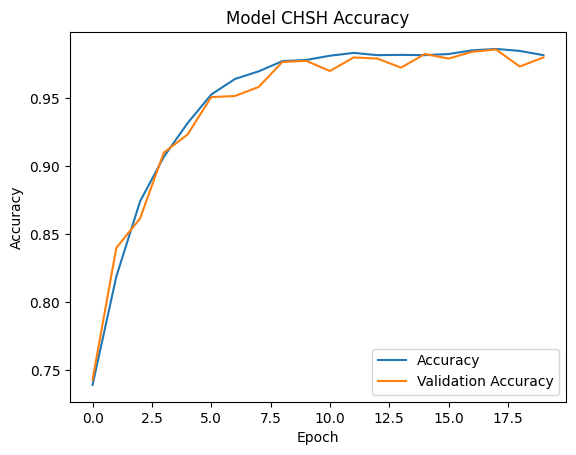

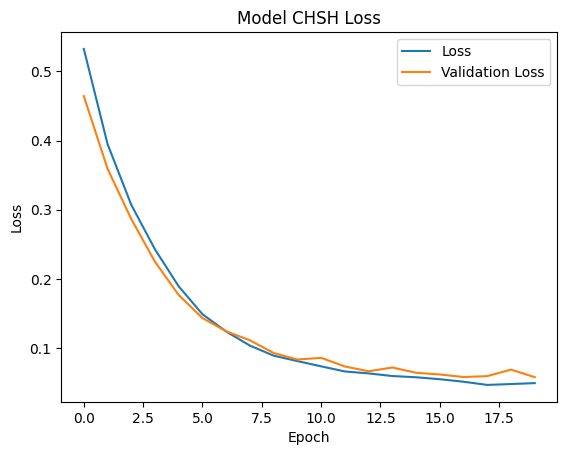

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in parameter_witness.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
